In [ ]:
# подключение необходимых библиотек для дальнейшей работы
from datetime import datetime # для работы с датой и временем
import numpy as np # для анализа, вычислений
import pandas as pd # работа с файлами
import matplotlib.pyplot as plt # графики
import seaborn as sns # также графики, но больше подходят для статистических и информативных графиков

sns.set_theme() # установка темы для дальнейших визуализаций - по умолчанию

df = pd.read_csv('/content/drive/MyDrive/MathModeling/LW7/INTC.csv') # чтение файла с данными корпорации Intel
df_last_5_years = df[pd.to_datetime(df['Date']) >= datetime(2018, 1, 1, 0, 0, 0)] # берём часть данных, в данном случае за последние 4 "с хвостиком" года (с 2018 по 2022)
df_last_5_years.head() # проверим корректность считанных с файла данных, выведем несколько строк

,Date,Open,High,Low,Close,Adj Close,Volume
9532,2018-01-02,46.380001,46.900002,46.209999,46.849998,42.087219,23370800
9533,2018-01-03,45.470001,46.209999,43.650002,45.259998,40.658863,116479000
9534,2018-01-04,43.520000,44.650002,42.689999,44.430000,39.913239,89209100
9535,2018-01-05,44.430000,45.150002,43.900002,44.740002,40.191727,41824000
9536,2018-01-08,44.270000,44.840000,43.959999,44.740002,40.191727,33733800


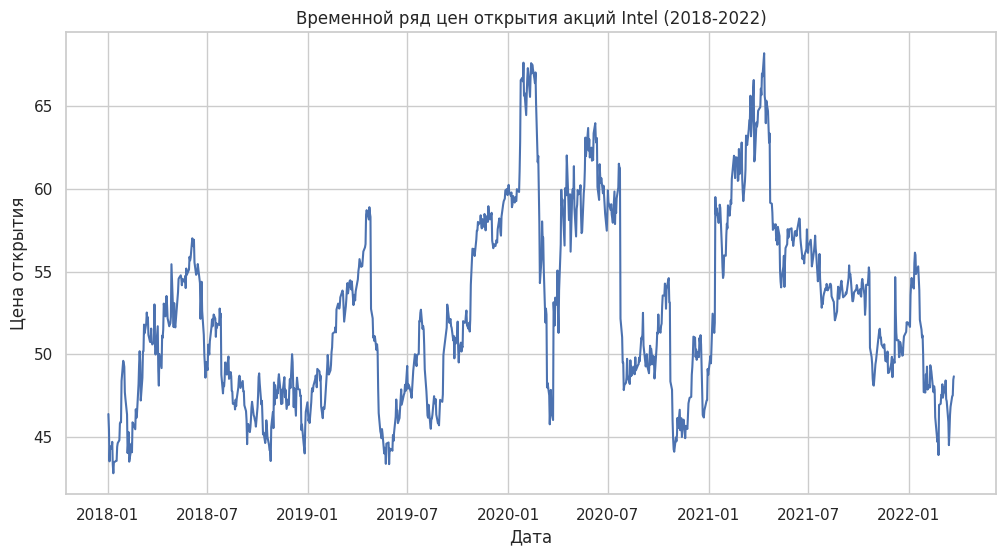

In [ ]:
fig, ax = plt.subplots(figsize = (12,6)) # создаем окно и график в нём
sns.lineplot(x=pd.to_datetime(df_last_5_years['Date']), y=df_last_5_years['Open']) # по x кладём данные столбца 'Date', по y данные столбца 'Open'

# создаём подписи
ax.set_title('Временной ряд цен открытия акций Intel (2018-2022)')
ax.set_xlabel('Дата')
ax.set_ylabel('Цена открытия')

plt.show() # отображаем получившийся график - временной ряд

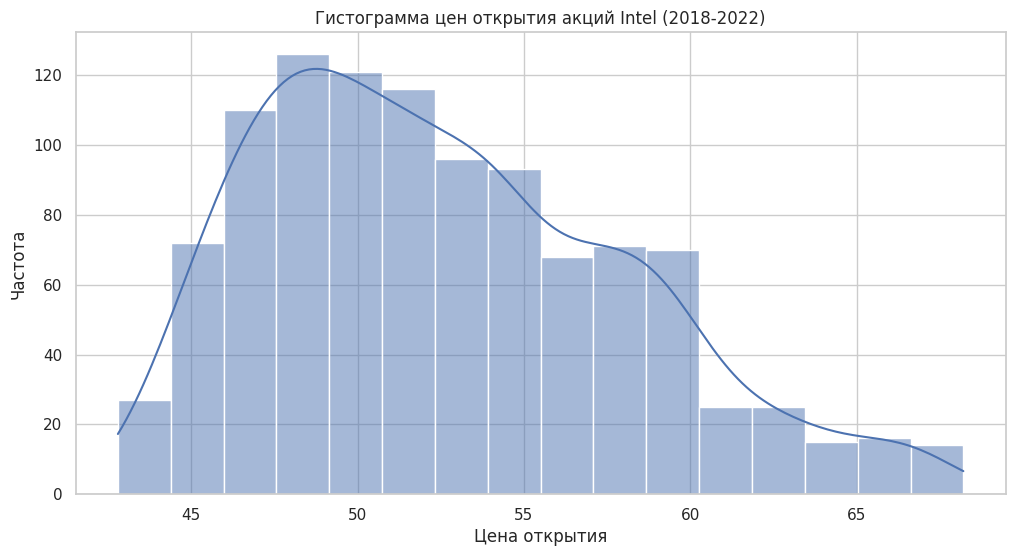

In [ ]:
# Построение гистограммы
fig, ax = plt.subplots(figsize=(12, 6)) # создаем окно и график в нём
sns.histplot(df_last_5_years['Open'], kde=True, ax=ax) # с помощью встроенной функции строим гистограмму

# создаём подписи
ax.set_title('Гистограмма цен открытия акций Intel (2018-2022)')
ax.set_xlabel('Цена открытия')
ax.set_ylabel('Частота')

plt.show() # отображаем получившуюся гистограмму - нашу плотность распределения

In [ ]:
# Находим все числовые характеристики для нашего распределения
mean_open = df_last_5_years['Open'].mean() # Мат.ожидание
std_open = df_last_5_years['Open'].std() # Среднеквадратическое отклонение
var_open = df_last_5_years['Open'].var() # Дисперсия
median_open = df_last_5_years['Open'].median() # Медиана
mode_open = df_last_5_years['Open'].mode() # Мода

# Вывод вычисленных значений
print(f'Мат.ожидание: {mean_open}')
print(f'Среднеквадратическое отклонение: {std_open}')
print(f'Дисперсия: {var_open}')
print(f'Медиана: {median_open}')
print(f'Мода: {mode_open.values}')


Среднее: 52.60616898403755
Стандартное отклонение: 5.477926216763982
Дисперсия: 30.007675636310154
Медиана: 51.810001
Мода: [49.5]


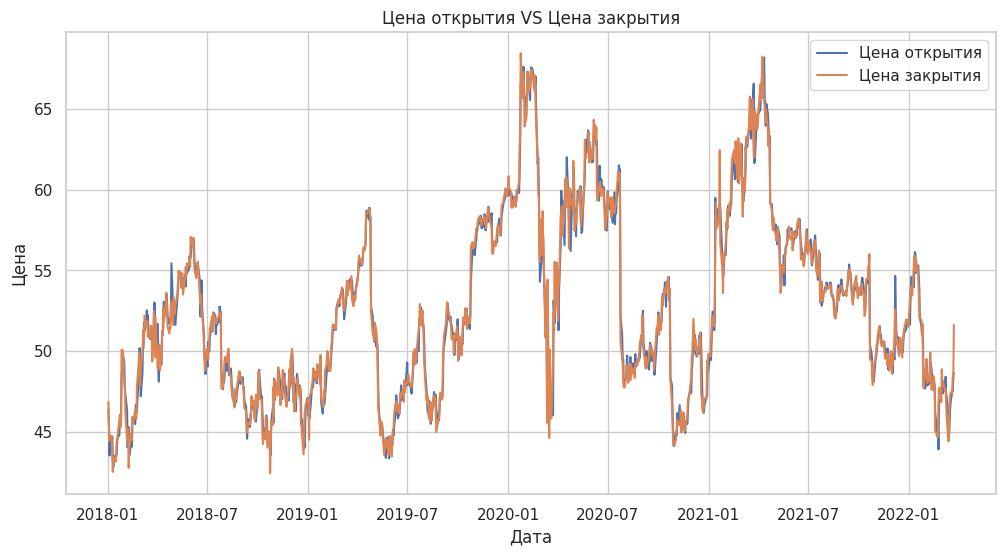

           Open     Close
Open   1.000000  0.986654
Close  0.986654  1.000000


In [ ]:
# Корреляция - Здесь проверим связь 'Цены открытия' с 'Ценой закрытия' и построим график

# Создаём окно
plt.figure(figsize=(12, 6))

# Создаём график
sns.lineplot(x=pd.to_datetime(df_last_5_years['Date']), y=df_last_5_years['Open'], label='Цена открытия')
sns.lineplot(x=pd.to_datetime(df_last_5_years['Date']), y=df_last_5_years['Close'], label='Цена закрытия')

# создаём подписи и легенду
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('Цена открытия VS Цена закрытия')
plt.legend()

# Отображаем график
plt.show()

# Вычисляем и выводим корреляцию
correlation = df_last_5_years[['Open', 'Close']].corr()
print(correlation)
